In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*強新*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2\\2013強新致股東.txt',
 './letterto shareholders2\\2014強新致股東.txt',
 './letterto shareholders2\\2015強新致股東.txt',
 './letterto shareholders2\\2016強新致股東.txt',
 './letterto shareholders2\\2017強新致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 1.953 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 一 前言 股東 女士 大家 好 一 二 經濟表現 回穩 歐債 危機 不 確定 暫解 全球 成長將 回暖 國際 國家 紛紛 寬 鬆 政策 全球 鋼鐵產量 及 需 求 復 甦 而 資本 支出 投資 增加 中國 消費力 提升 增長 車市 銷售量 於 金融 風暴後持續 回升 整體 經營 環境 相較 於 一 一 提升 許多 惟面 臨中 國大陸 鋼鐵產 能過 剩 各國 自由 貿易 協議 紛紛 簽立 貿易環 境面 對 國家 憑 藉 著 低廉 成本 關稅 優勢 強力 競爭 下 愈來 愈 嚴竣 國內 生產 環保 成本 亦 不斷 增加 一 是 充滿 機會 變數 考驗 著 經營 團隊 應變 及 能力 一 二 母公司 全 營業 收入 新 參拾 貳 零 捌 拾 玖 一 一 增加 一 二 稅後淨 利壹 壹佰貳 拾伍 一 一 增加 貳 億零 貳 拾 每股 盈餘為 元 另 一 二 合 併 營收 新 肆拾 玖 億 柒仟 伍佰柒拾 貳 一 一 增加 一 二 合 併 稅後淨 利為 貳 億 壹仟 柒佰貳 陸萬元 一 一 增加 貳 億 貳 仟 肆佰陸拾 參萬元 一 三 國際 復 甦 螺絲 出口 歐 美兩大 需求 也 可望 增長 中國 內 迅速 擴張 消費 需求 及 新型 城鎮化 政策 推生 更 多 購車 需 求及 消費 升級 中國 及光 電產業 建廠 在 前景 可期 榮景下 中國 鋼鐵 產能過 剩及 各國紛 紛築起 貿易 壁壘 也 將衝擊 經營 環境 營運 方向 在 伸線 事 業 積極 新 外銷 改良 製 程 技 術 以 提升 品質 新產品 增 設 製 程 廢 棄 物 回收 系統 在 電解 觸控 面板 及 建廠 需求 以品 質及 良好 品牌形象 積極 中國 打開 知名度 拓展 產品線 以 更 完整 供應 體系 未來面 對 多 變的經 營環境 惟有 不斷 地 改善 應變 才能 因應 考驗 希望 股東 秉持 以往 對 支持 愛護 最 後 敬祝 身體 平安 喜樂 董事 長',
 '壹 致股 東報 告書 一 前言 股東 女士 大家 好 一 三 穩定 下降 量化 寬 鬆 政策 將 退場 歐 洲 景氣 通貨 緊縮 危機 發酵 歐洲 央行 實施 寬 鬆 政策 希臘 問題 歐洲 投下 不 確定 變數 攀升 表現 疲軟 中國 於 製 造 業 產 能 過 剩 政 府 反 貪 打腐 政策 導致 高端 消

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  472


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 472)


<5x472 sparse matrix of type '<class 'numpy.float64'>'
	with 799 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
不斷 0.07595475162256995 0 6
中國 0.1898868790564249 0 11
以品 0.07969978756892969 0 28
伍佰柒拾 0.07969978756892969 0 33
低廉 0.07969978756892969 0 36
供應 0.07969978756892969 0 39
億零 0.05337587660027203 0 52
優勢 0.07969978756892969 0 53
充滿 0.05337587660027203 0 54
全球 0.08980294018429508 0 57
出口 0.05337587660027203 0 60
利壹 0.07969978756892969 0 62
前景 0.05337587660027203 0 65
剩及 0.07969978756892969 0 67
升級 0.06430128677994264 0 79
協議 0.07969978756892969 0 81
危機 0.05337587660027203 0 82
參萬元 0.07969978756892969 0 88
及光 0.06430128677994264 0 89
可望 0.06430128677994264 0 95
可期 0.07969978756892969 0 96
各國 0.05337587660027203 0 97
各國紛 0.07969978756892969 0 98
品牌形象 0.07969978756892969 0 102
嚴竣 0.07969978756892969 0 107
回升 0.07969978756892969 0 108
回收 0.07969978756892969 0 109
回暖 0.07969978756892969 0 110
回穩 0.07969978756892969 0 111
國大陸 0.07969978756892969 0 117
國家 0.15939957513785938 0 118
國際 0.10675175320054406 0 121
團隊 0.05337587660027203 0 124
城鎮化 0.07969978756892969 0 128
境面 0.0796997

建廠 0.07725450924695731 2 169
強新 0.08106363123034437 2 173
微幅 0.08106363123034437 2 175
心理因素 0.08106363123034437 2 177
急漲 0.08106363123034437 2 178
情況 0.08106363123034437 2 181
把握 0.05428925859530902 2 197
拾肆 0.08106363123034437 2 204
指數 0.08106363123034437 2 205
挑戰 0.06540162725851399 2 206
推升 0.05428925859530902 2 210
推廣高 0.08106363123034437 2 212
提升 0.10857851719061803 2 216
擴展 0.06540162725851399 2 218
故一 0.05428925859530902 2 237
整體 0.07725450924695731 2 240
新一代 0.05428925859530902 2 241
新低 0.08106363123034437 2 242
日系 0.06540162725851399 2 248
更降 0.08106363123034437 2 254
柒佰 0.08106363123034437 2 260
業界 0.06540162725851399 2 264
歐元 0.06540162725851399 2 270
歐元區 0.08106363123034437 2 271
毛利 0.05428925859530902 2 277
氣氛 0.08106363123034437 2 279
決定 0.08106363123034437 2 281
波動 0.08106363123034437 2 283
海外 0.06540162725851399 2 284
消長 0.06540162725851399 2 287
減少 0.21715703438123607 2 289
滑落 0.06540162725851399 2 291
為導 0.08106363123034437 2 292
營運及 0.06540162725851399 2 297
狀況 0.081

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2\2013強新致股東.txt,./letterto shareholders2\2014強新致股東.txt,./letterto shareholders2\2015強新致股東.txt,./letterto shareholders2\2016強新致股東.txt,./letterto shareholders2\2017強新致股東.txt
0,一碼,0.000000,0.000000,0.081064,0.000000,0.000000
1,一管,0.000000,0.000000,0.000000,0.000000,0.078879
2,上揚,0.000000,0.000000,0.000000,0.000000,0.078879
3,下跌,0.000000,0.000000,0.081064,0.000000,0.000000
4,下降,0.000000,0.071725,0.065402,0.000000,0.000000
5,不佳,0.000000,0.000000,0.081064,0.000000,0.000000
6,不斷,0.075955,0.042362,0.038627,0.039201,0.037586
7,不明,0.000000,0.000000,0.081064,0.000000,0.000000
8,不確,0.000000,0.000000,0.000000,0.000000,0.078879
9,並持續,0.000000,0.059538,0.054289,0.055095,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2\2013強新致股東.txt,./letterto shareholders2\2014強新致股東.txt,./letterto shareholders2\2015強新致股東.txt,./letterto shareholders2\2016強新致股東.txt,./letterto shareholders2\2017強新致股東.txt
0,一碼,0.000000,0.000000,0.081064,0.000000,0.000000
1,一管,0.000000,0.000000,0.000000,0.000000,0.078879
2,上揚,0.000000,0.000000,0.000000,0.000000,0.078879
3,下跌,0.000000,0.000000,0.081064,0.000000,0.000000
4,下降,0.000000,0.071725,0.065402,0.000000,0.000000
5,不佳,0.000000,0.000000,0.081064,0.000000,0.000000
6,不斷,0.075955,0.042362,0.038627,0.039201,0.037586
7,不明,0.000000,0.000000,0.081064,0.000000,0.000000
8,不確,0.000000,0.000000,0.000000,0.000000,0.078879
9,並持續,0.000000,0.059538,0.054289,0.055095,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08890137],
       [0.08106363, 0.        , 0.        , ..., 0.        , 0.08106363,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08226723, 0.        ,
        0.        ],
       [0.        , 0.078879  , 0.078879  , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一碼,0,0,1,0,0
1,一管,0,0,0,0,1
2,上揚,0,0,0,0,1
3,下跌,0,0,1,0,0
4,下降,0,1,1,0,0
5,不佳,0,0,1,0,0
6,不斷,2,1,1,1,1
7,不明,0,0,1,0,0
8,不確,0,0,0,0,1
9,並持續,0,1,1,1,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一碼,0,0,1,0,0
1,一管,0,0,0,0,1
2,上揚,0,0,0,0,1
3,下跌,0,0,1,0,0
4,下降,0,1,1,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一碼,0,0,1,0,0
1,一管,0,0,0,0,1
2,上揚,0,0,0,0,1
3,下跌,0,0,1,0,0
4,下降,0,1,1,0,0
5,不佳,0,0,1,0,0
6,不斷,2,1,1,1,1
7,不明,0,0,1,0,0
8,不確,0,0,0,0,1
9,並持續,0,1,1,1,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一碼': 1,
 '一管': 1,
 '上揚': 1,
 '下跌': 1,
 '下降': 2,
 '不佳': 1,
 '不斷': 6,
 '不明': 1,
 '不確': 1,
 '並持續': 3,
 '並衝擊': 1,
 '中國': 17,
 '中國大陸': 3,
 '中積體': 1,
 '中韓': 1,
 '主義熱潮': 1,
 '之工業': 1,
 '之持續': 1,
 '事業部': 1,
 '二月份': 1,
 '互有': 2,
 '亞洲': 3,
 '交期': 2,
 '亮眼': 1,
 '人民': 1,
 '仍過': 1,
 '仟伍': 1,
 '以供': 2,
 '以品': 1,
 '以往': 5,
 '以致': 1,
 '以貼': 1,
 '以長': 1,
 '伍佰柒拾': 1,
 '伸線': 5,
 '但是': 1,
 '低廉': 1,
 '作為': 1,
 '來面': 1,
 '供應': 1,
 '供給': 1,
 '保護': 1,
 '債務': 1,
 '僵局': 1,
 '價值': 1,
 '價帶': 1,
 '價格': 4,
 '價格整': 1,
 '億伍': 1,
 '億玖仟': 2,
 '億玖佰零陸': 1,
 '億肆': 1,
 '億零': 3,
 '優勢': 1,
 '充滿': 3,
 '光電': 1,
 '內銷': 4,
 '全球': 11,
 '兩具': 1,
 '冬季': 1,
 '出口': 4,
 '分散': 2,
 '利壹': 1,
 '利為': 5,
 '刺激': 2,
 '前景': 3,
 '前言': 5,
 '剩及': 1,
 '加強': 2,
 '加約': 2,
 '加速': 2,
 '勢力': 1,
 '匯率': 1,
 '區域': 2,
 '十九': 1,
 '十二五': 1,
 '十二月份': 1,
 '升值': 1,
 '升息': 2,
 '升級': 2,
 '升高': 1,
 '協議': 1,
 '危機': 3,
 '參仟玖佰柒': 1,
 '參佰捌': 1,
 '參億': 1,
 '參億零陸佰': 1,
 '參拾': 4,
 '參萬元': 1,
 '及光': 2,
 '及服': 1,
 '反歐': 1,
 '反體制': 1,
 '取代': 1,
 '受此': 1,
 '可望': 2,
 '可期': 1

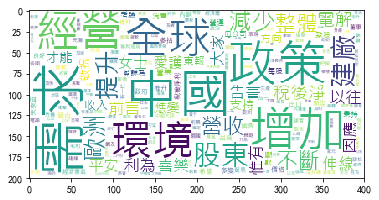

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('需求', 19),
 ('中國', 17),
 ('政策', 15),
 ('增加', 14),
 ('全球', 11),
 ('經營', 11),
 ('環境', 10),
 ('股東', 10),
 ('建廠', 9),
 ('提升', 8)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfdba0f0>,
 <a list of 10 Text xticklabel objects>)

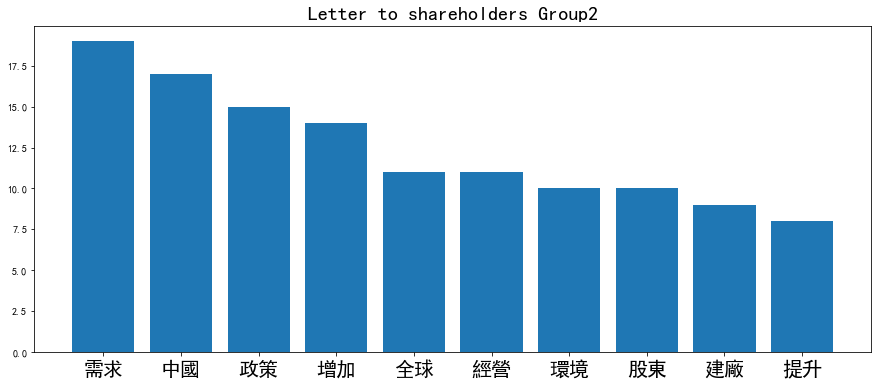

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.1730583 ,  0.7503418 ],
       [ 0.39703846,  0.04401596],
       [ 0.60094451, -0.21523516],
       [-0.28925591, -0.27797515],
       [-0.53566876, -0.30114745]])

No handles with labels found to put in legend.


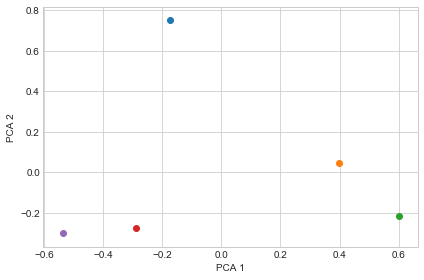

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

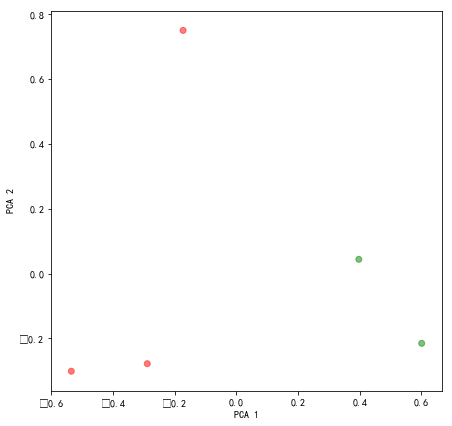

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()